In [ ]:
#Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


import math
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
from sklearn.preprocessing import StandardScaler

In [ ]:
#Loading Dataset

In [ ]:
dataset = pd.read_csv('creditcard.csv')

In [ ]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
#Data Preprocessing

In [ ]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
dataset.isnull().values.any()

False

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#Feature Engineering task

In [ ]:
dataset.drop('Time', axis=1, inplace=True)

In [ ]:
X = dataset.drop('Class', axis=1)
y = dataset['Class']
X.shape, y.shape

((284807, 29), (284807,))

In [ ]:
temp_df = dataset.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
amount = temp_df['Amount'].values
temp_df['Amount'] = standard.fit_transform(amount.reshape(-1,1))
X_scaled = temp_df.drop('Class', axis=1)
y_scaled = temp_df['Class']
X_scaled.shape, y_scaled.shape

((284807, 29), (284807,))

In [ ]:
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
class_count_df = pd.DataFrame(dataset['Class'].value_counts().rename_axis('Class').reset_index(name='Counts'))
class_count_df['Class'].replace({0:'Normal',
                                 1:'Fraud'}, inplace=True)
class_count_df.head()

,Class,Counts
0,Normal,284315
1,Fraud,492


In [ ]:
fraud = dataset[dataset['Class'] == 1]
normal = dataset[dataset['Class'] == 0]
fraud.shape, normal.shape

((492, 30), (284315, 30))

In [ ]:
fraud_frc = len(fraud)/float(len(dataset))
fraud_frc

0.001727485630620034

In [ ]:
print(f"Percentage of Fraud Tnx in datasets : {fraud_frc*100:.2f}%")

Percentage of Fraud Tnx in datasets : 0.17%


In [ ]:
#DATA ANALYSIS

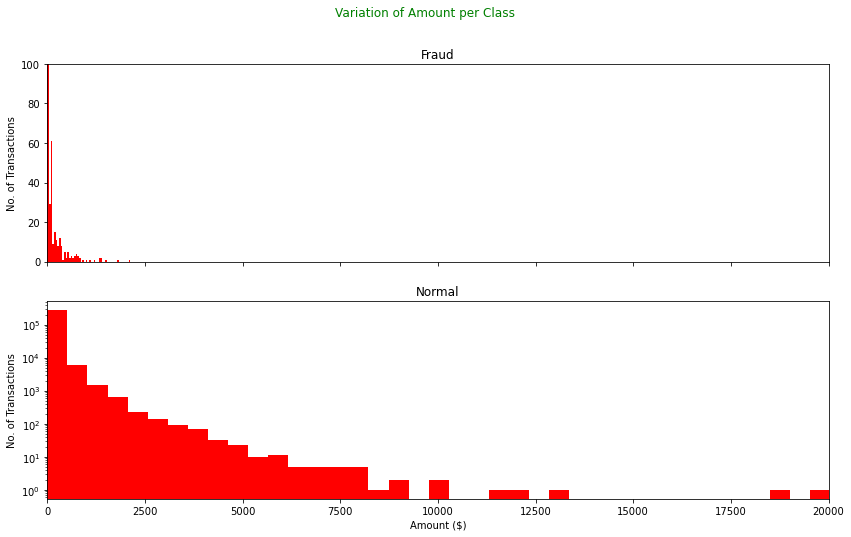

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               sharex=True)
fig.suptitle("Variation of Amount per Class", color='green')
bins=50
ax0.hist(fraud['Amount'], bins=bins, color='red')
ax0.set_title('Fraud')
ax0.set_ylim(0, 100)
ax0.set_ylabel('No. of Transactions')

ax1.hist(normal['Amount'], bins=bins, color='red')
ax1.set_title('Normal')
ax1.set_ylabel('No. of Transactions')

plt.xlim(0, 20000)
plt.xlabel('Amount ($)')
plt.yscale('log')

C:\Users\Hp\AppData\Local\Temp\ipykernel_1872\1475047372.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=labels.astype(int), c='blue', fontsize=8, fontweight='bold')


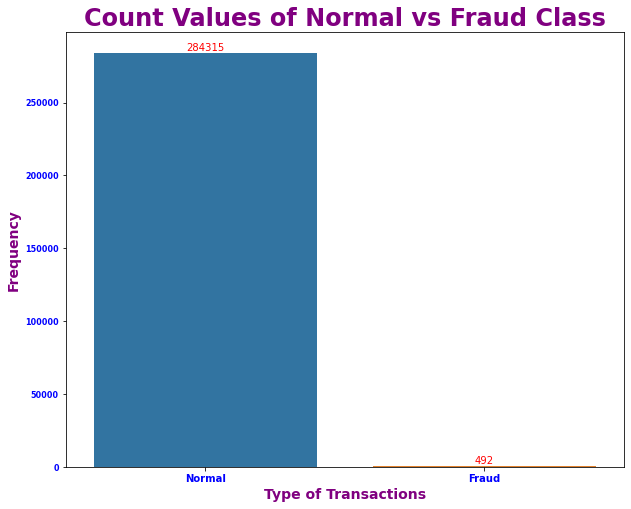

In [ ]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(10)

ax = sns.barplot(x=class_count_df['Class'],
                 y=class_count_df['Counts'])

ax.bar_label(ax.containers[0], color='red') ## Showing Values at top of Each Bar.

ax.set_xticklabels(labels=list(class_count_df['Class']) ,c='blue', rotation=0, fontsize=10, fontweight='bold')
labels, location = plt.yticks()
ax.set_yticklabels(labels=labels.astype(int), c='blue', fontsize=8, fontweight='bold')

plt.xlabel(xlabel='Type of Transactions', fontsize=14, fontweight='bold').set_color('purple')
plt.ylabel(ylabel='Frequency', fontsize=14, fontweight='bold').set_color('purple')
plt.title(label='Count Values of Normal vs Fraud Class', fontsize=24, fontweight='bold').set_color('purple')

In [ ]:
#Logistic Regression Model

In [ ]:
def LR_model(X,y):
    print("Spliting Datasets....")
    from sklearn.model_selection import train_test_split
    np.random.seed(42)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    print("Successfully splitted!!!")

    print("Model Fitting.....")
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    print("Successfully model fitted!!!")

    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    print("------------Training Prediction--------------")
    y_preds = lr.predict(X_train)
    print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_train, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_train, y_preds)*100:2f}%\n")

    print("------------Test Prediction--------------")

    y_preds =lr.predict(X_test)
    print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_test, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_test, y_preds)*100:2f}%\n")

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.88      0.67      0.76       394

    accuracy                           1.00    227845
   macro avg       0.94      0.83      0.88    227845
weighted avg       1.00      1.00      1.00    227845



Accuracy Score:

99.927143%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.58      0.69        98

    accuracy                           1.00     56962
   macro avg       0.92      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962



Accuracy Score:

99.908711%



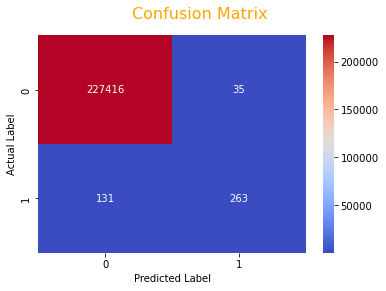

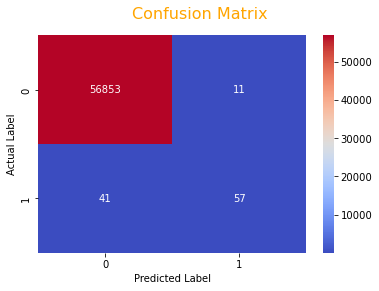

In [ ]:
LR_model(X, y)

In [ ]:
# Naive_Bayesian_model

In [ ]:
def GNB_model(X,y):
    print("Spliting Datasets....")
    from sklearn.model_selection import train_test_split
    np.random.seed(42)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    print("Successfully splitted!!!")

    print("Model Fitting.....")
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    print("Successfully model fitted!!!")

    print("------------Training Prediction--------------")
    y_preds = gnb.predict(X_train)
    print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_train, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_train, y_preds)*100:2f}%\n")

    print("------------Test Prediction--------------")

    y_preds = gnb.predict(X_test)
    print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_test, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_test, y_preds)*100:2f}%\n")

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    227451
           1       0.06      0.83      0.12       394

    accuracy                           0.98    227845
   macro avg       0.53      0.91      0.55    227845
weighted avg       1.00      0.98      0.99    227845



Accuracy Score:

97.848537%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.82      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.90      0.55     56962
weighted avg       1.00      0.98      0.99     56962



Accuracy Score:

97.763421%



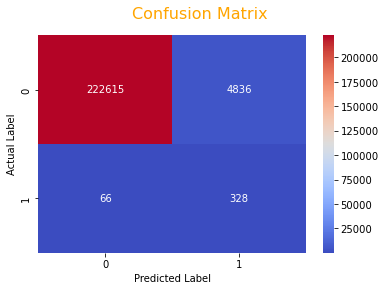

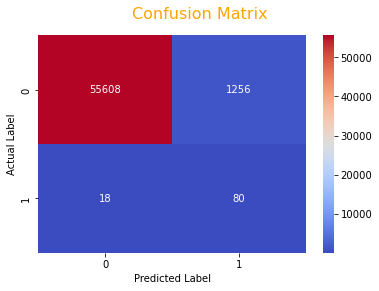

In [ ]:
GNB_model(X,y)